<a href="https://colab.research.google.com/github/rohitvmeshram/play-store-data-Analysis/blob/main/play_store_project_individual_notebook_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
Explore and analyze the data to discover key factors responsible for app engagement and success.

 **SUMMARY**

 I downloaded the project first work individually gaining insights doing some eda . After doing some random EDAs.I gained some confidence.I took play store data.csv 

In [ ]:
#import library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =pd.read_csv('/content/Play Store Data.csv')

In [ ]:
print('The shape of data is',df.shape)

The shape of data is (10841, 13)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**Cleaning data** 

The very first problem that I faced on all colomuns are present in diffrent type,caluating all unique values.we plot boxplot and hist for finding outliers

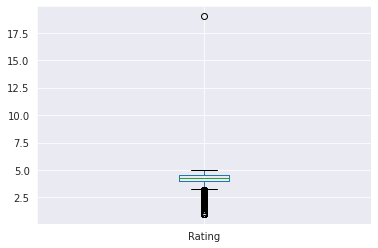

In [ ]:
df.boxplot()

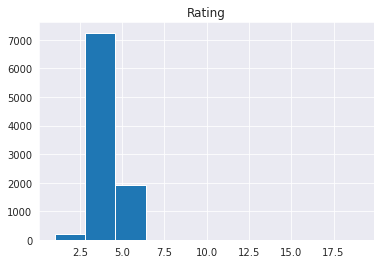

In [ ]:
df.hist();

Here we can see the rating is basically upto '5' but in our data rating showing upto '19'

In [ ]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
df.drop(10472,inplace=True)
df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [ ]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [ ]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'].dtype

dtype('float64')

In [ ]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
df[df['Reviews'] =='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
df['Reviews'] = df.Reviews.replace("0.0",0)
df['Reviews'] = df.Reviews.replace("3.0M",3000000.0)
df['Reviews'] = df['Reviews'].astype(float)
df['Reviews'].dtype

dtype('float64')

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
df['Size'] = df.Size.replace("Varies with device",np.nan)
df['Size'] = df.Size.str.replace("M","000") # All size values became the kilobyte type.
df['Size'] = df.Size.str.replace("k","")
df['Size'] = df.Size.replace("1,000+",1000)
df['Size'] =df['Size'].astype(float)
df['Size'].dtype

dtype('float64')

In [ ]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df['Installs'] = df.Installs.str.replace(",","")
df['Installs'] = df.Installs.str.replace("+","")
df['Installs'] = df.Installs.replace("Free",np.nan)
df['Installs'] = df['Installs'].astype(float)
df['Installs'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('float64')

In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
df['Price'] = df.Price.replace("Everyone",np.nan)
df['Price'] = df.Price.str.replace("$","").astype(float)
df['Price'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('float64')

In [ ]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068141,0.082134,0.051355,-0.021903
Reviews,0.068141,1.000000,0.233791,0.643122,-0.009667
Size,0.082134,0.233791,1.000000,0.164608,-0.022772
Installs,0.051355,0.643122,0.164608,1.000000,-0.011689
Price,-0.021903,-0.009667,-0.022772,-0.011689,1.000000


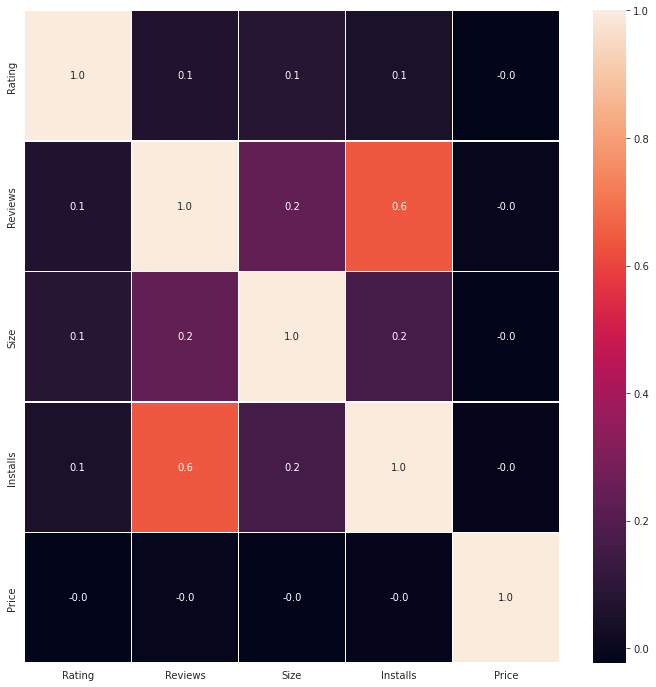

In [ ]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


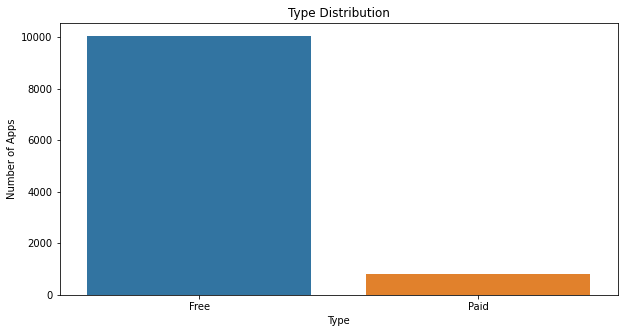

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(df['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

play store app Review Analysis project was done by group of 5 members – Rahul gaykwad,Rutuja hingankar,Narayan borade,prashik ingle and Rohit Meshram. In this project we got 2 different csv files as an input. The Csv files are play store data.csv and reviews.csv.

So, we decided to divide these 2 csv files among 5 and start exploring dataset. I worked on  play store data.csv

**Rohit Meshram** I downloaded the project first work individually gaining insights doing some eda etcs After doing some random EDAs.I gained some confidence.I took play store data.csv The very first problem that I faced on lots of missing values in categary , rating, price,size and install.missing value show in  boxpolt and hist. caluating all unique values. drop the unrelevent data .repalce str to flot in category,Reviews,Size,Price and Installs 

**Rahul gaykwad** When I start to exploring play store data.csv file, then I found null values in columnus such as: rating,size ,current android version ,update version . we fill that null values with nan and using the threshold we set limit for data then drop threshold .null values are present in rating,type, android version cuurent version and type. for easy analysis  we convert str data into float 

 **Rutuja Hingankar** Initially I started with looking at each database available to us for play store project. I went through various columns available within each of the databases tried to make sense of what all data is available to us. I took ‘review.csv’ and understood that it contained details of each app ,translated review , sentiment ,sentiment popularity and sentiment subjectivety.rename all coloums .some duplicate values present in data  find that value and drop from data set.

 **Prashik Ingle** I work on Exploratory Data Analysis,firstly  we compair  categpry with number of app. From this plotting we know that most of the apps in the play store are from the categories of 'Family', 'Game' and also 'Tools.
From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or 4.7

**Narayn Borde** I work on Exploratory Data Analysis,firstly we compair category with rating ,price review and install sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows aproportional behavior, when variancebis too high or low.There are more numbers of positive reviews of the apps in which facebook, instagram, whatsapp messanger are the most review apps.

INFERENCE: most type of App belong to free type 